In [72]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rc



import warnings
warnings.filterwarnings('ignore')

In [41]:
congestion = pd.read_csv("Resources/Chicago_Traffic_Tracker_-_Historical_Congestion_Estimates_by_Region_-_2013-2018.csv", low_memory=False)
congestion.head()

,TIME,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED
0,01/29/2015 01:40:35 PM,22,33,429,25.23
1,01/05/2015 01:10:46 PM,18,58,1058,21.14
2,01/20/2015 05:01:21 AM,14,26,394,25.23
3,01/03/2015 05:10:25 AM,24,17,360,23.86
4,01/10/2015 08:31:12 PM,23,54,761,19.77


In [42]:
congestion.describe()

,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED
count,7.089311e+06,7.089311e+06,7.089311e+06,7.089311e+06
mean,1.500000e+01,3.642507e+01,5.470367e+02,2.235961e+01
std,8.366601e+00,2.922485e+01,4.481749e+02,8.580152e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+00,1.400000e+01,2.040000e+02,1.977000e+01
50%,1.500000e+01,3.000000e+01,4.530000e+02,2.380000e+01
75%,2.200000e+01,5.100000e+01,7.840000e+02,2.700000e+01
max,2.900000e+01,2.900000e+02,5.379000e+03,1.738600e+02


In [43]:
congestion2 = pd.DataFrame(congestion.TIME.str.split(' ',1).tolist(),columns = ['date','time'])
congestion2.head()

,date,time
0,01/29/2015,01:40:35 PM
1,01/05/2015,01:10:46 PM
2,01/20/2015,05:01:21 AM
3,01/03/2015,05:10:25 AM
4,01/10/2015,08:31:12 PM


In [44]:
congestion3 = pd.DataFrame(congestion2.date.str.split('/').tolist(),columns = ['month','day','year'])
congestion3.head()

,month,day,year
0,01,29,2015
1,01,05,2015
2,01,20,2015
3,01,03,2015
4,01,10,2015


In [45]:
congestion_month = congestion

congestion['year'] = congestion3['year']
congestion.head()

,TIME,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED,year
0,01/29/2015 01:40:35 PM,22,33,429,25.23,2015
1,01/05/2015 01:10:46 PM,18,58,1058,21.14,2015
2,01/20/2015 05:01:21 AM,14,26,394,25.23,2015
3,01/03/2015 05:10:25 AM,24,17,360,23.86,2015
4,01/10/2015 08:31:12 PM,23,54,761,19.77,2015


In [8]:
congestion_time = pd.DataFrame(congestion2.time.str.split().tolist(),columns = ['time','am_pm'])
congestion_time.head()

,time,am_pm
0,01:40:35,PM
1,01:10:46,PM
2,05:01:21,AM
3,05:10:25,AM
4,08:31:12,PM


In [9]:
congestion_time2 = pd.DataFrame(congestion_time.time.str.split(':').tolist(),columns = ['hr','min','sec'])
congestion_time2['am_pm'] = congestion_time['am_pm']
congestion_time2.head()

,hr,min,sec,am_pm
0,01,40,35,PM
1,01,10,46,PM
2,05,01,21,AM
3,05,10,25,AM
4,08,31,12,PM


In [10]:
congestion_time2.loc[congestion_time2['hr'] == '12','hr'] = '0'
congestion_time2.loc[congestion_time2['am_pm'] == "PM",'am_pm'] = 12
congestion_time2.loc[congestion_time2['am_pm'] == "AM",'am_pm'] = 0
congestion_time2['hr'].max()


'11'

In [11]:
congestion_time2['hr'] = congestion_time2['hr'].convert_objects(convert_numeric=True)
congestion_time2['hour'] = congestion_time2['hr'] + congestion_time2['am_pm']
congestion_time2.head()
congestion_time2['hour'].max()

23

In [12]:
congestion['hour'] = congestion_time2['hour']
congestion.head()

,TIME,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED,year,hour
0,01/29/2015 01:40:35 PM,22,33,429,25.23,2015,13
1,01/05/2015 01:10:46 PM,18,58,1058,21.14,2015,13
2,01/20/2015 05:01:21 AM,14,26,394,25.23,2015,5
3,01/03/2015 05:10:25 AM,24,17,360,23.86,2015,5
4,01/10/2015 08:31:12 PM,23,54,761,19.77,2015,20


In [13]:
congestion_present_temp = congestion.loc[congestion['year'] > "2016",:]
congestion_present = congestion_present_temp.loc[congestion_present_temp['SPEED'] > 0,:]

# Remove all "0" speed entries from hours 2 and 3 (2am-4am)
# congestion_present_cleaned2 = congestion_present_temp.drop(congestion_present_temp[(congestion_present_temp.hour == 2) & (congestion_present_temp.SPEED == 0)].index)
# congestion_present = congestion_present_cleaned2.drop(congestion_present_cleaned2[(congestion_present_cleaned2.hour == 3) & (congestion_present_cleaned2.SPEED == 0)].index)

congestion_present.head()

,TIME,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED,year,hour
3096225,05/03/2018 12:01:31 PM,24,47,845,22.50,2018,12
3096266,05/03/2018 12:01:31 PM,25,18,277,29.32,2018,12
3096389,05/03/2018 12:01:31 PM,26,49,896,27.27,2018,12
3096471,05/03/2018 12:01:31 PM,27,22,270,27.34,2018,12
3100392,05/03/2018 12:01:31 PM,28,7,101,39.55,2018,12


In [14]:
congestion_clean = congestion_present.loc[congestion_present['SPEED'] <= 45,:]
# congestion_clean = congestion_present
congestion_clean.head()

,TIME,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED,year,hour
3096225,05/03/2018 12:01:31 PM,24,47,845,22.50,2018,12
3096266,05/03/2018 12:01:31 PM,25,18,277,29.32,2018,12
3096389,05/03/2018 12:01:31 PM,26,49,896,27.27,2018,12
3096471,05/03/2018 12:01:31 PM,27,22,270,27.34,2018,12
3100392,05/03/2018 12:01:31 PM,28,7,101,39.55,2018,12


In [15]:
congestion_region = congestion_clean.groupby('REGION_ID')
congestion_region_df = pd.DataFrame(congestion_region.mean())
congestion_region_df['congestion'] = (45-congestion_region_df['SPEED']) / 45 * 100
congestion_region_df

,BUS COUNT,NUMBER OF READS,SPEED,congestion
REGION_ID,,,,
1,22.179399,347.628862,21.760622,51.643062
2,31.168334,460.184192,27.399208,39.112871
3,47.428873,728.835985,22.058373,50.981392
4,33.396979,514.981728,20.647313,54.117083
5,48.083678,845.004620,23.378937,48.046807
6,42.597540,726.188352,21.653939,51.880135
7,40.906344,643.003617,21.131203,53.041770
8,65.666951,1123.388059,20.479217,54.490629
9,22.244995,345.720935,23.703428,47.325716


In [15]:
congestion_region_df.to_csv("Resources/Congestion_by_Region.csv")

(20, 70)

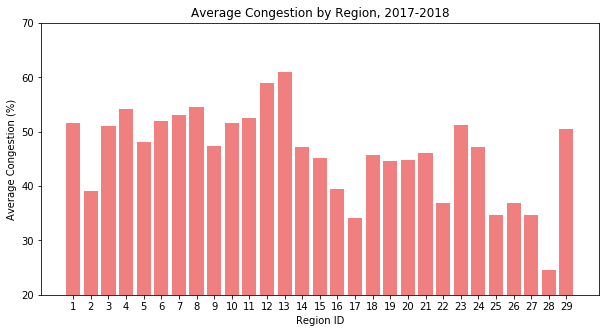

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(congestion_region_df.index.values,congestion_region_df['congestion'],color='lightcoral')

ax.set_title("Average Congestion by Region, 2017-2018")
ax.set_xlabel("Region ID")
ax.set_ylabel("Average Congestion (%)")
ax.set_xticks(congestion_region_df.index.values)
ax.set_ylim(20, 70)
# plt.savefig("Congestion_by_Region.png",bbox_inches='tight')

In [17]:
congestion_hour = congestion_clean.groupby('hour')
congestion_hour_df = pd.DataFrame(congestion_hour.mean())
congestion_hour_df['congestion'] = (45-congestion_hour_df['SPEED']) / 45 * 100
congestion_hour_df

,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED,congestion
hour,,,,,
0,14.274009,15.167543,217.339658,26.821258,40.397205
1,14.182955,11.204545,154.721088,28.107480,37.538934
2,14.912189,8.793396,104.742351,28.319966,37.066742
3,14.906899,8.012778,101.947044,29.115813,35.298193
4,14.093554,13.011737,179.378908,28.818291,35.959354
5,14.562599,23.763770,351.395365,26.710283,40.643815
6,14.892574,40.705626,606.553574,25.226583,43.940926
7,14.917803,56.166673,857.163129,23.118427,48.625718
8,14.928003,59.476912,926.242645,22.773431,49.392376


(30, 60)

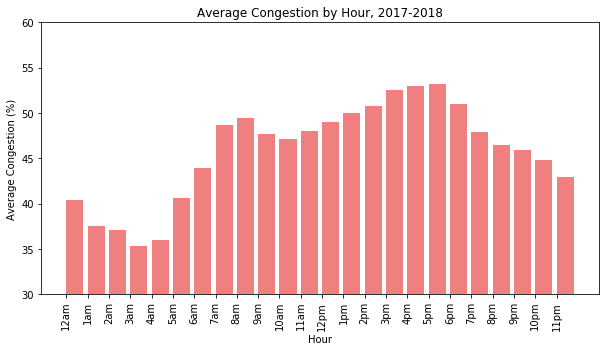

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(congestion_hour_df.index.values,congestion_hour_df['congestion'],align='edge',color='lightcoral')

ax.set_title("Average Congestion by Hour, 2017-2018")
ax.set_xlabel("Hour")
ax.set_ylabel("Average Congestion (%)")
ax.set_xticks(congestion_hour_df.index.values)
ax.set_xticklabels(['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'],ha='center')
ax.tick_params(axis='x', rotation=90)
ax.set_ylim(30, 60)
# plt.savefig("Congestion_by_Hour.png",bbox_inches='tight')

(0, 60)

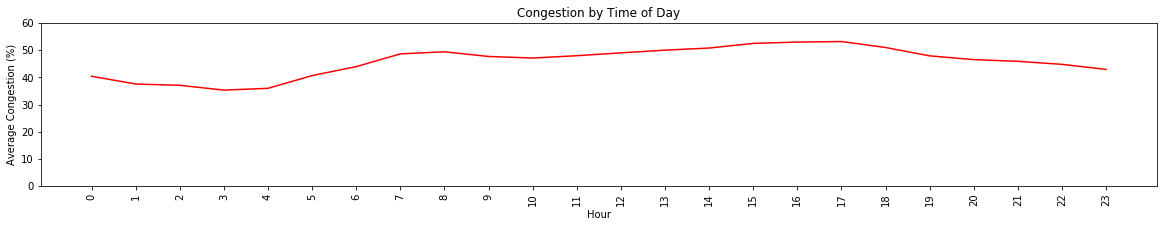

In [19]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot(congestion_hour_df.index.values,congestion_hour_df['congestion'],color='red')

ax.set_title("Congestion by Time of Day")
ax.set_xlabel("Hour")
ax.set_ylabel("Average Congestion (%)")
ax.set_xticks(congestion_hour_df.index.values)
# ax.set_xticklabels(['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'],ha='center')
ax.tick_params(axis='x', rotation=90)
ax.set_ylim(0, 60)
# plt.savefig("Congestion_by_Hour.png",bbox_inches='tight')

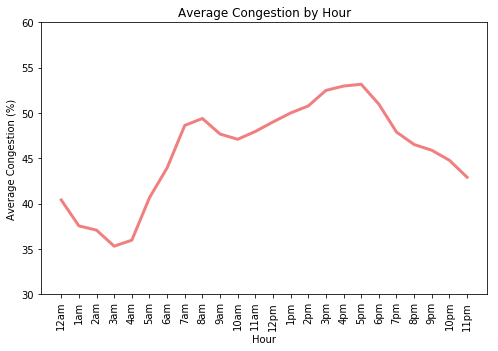

In [39]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(congestion_hour_df.index.values,congestion_hour_df['congestion'],color='lightcoral',linewidth=3)

ax.set_title("Average Congestion by Hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Average Congestion (%)")
ax.set_xticks(congestion_hour_df.index.values)
ax.set_xticklabels(['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'],ha='center')
ax.tick_params(axis='x', rotation=90)
ax.set_ylim(30, 60)
plt.savefig("Congestion_by_Hour2.png",bbox_inches='tight')

In [23]:
crash_hour = pd.read_csv('Resources/Crashes_by_hour.csv')
crash_hour

,CRASH_HOUR,RD_NO
0,0,3868
1,1,3311
2,2,2937
3,3,2436
4,4,2218
5,5,2865
6,6,4766
7,7,9639
8,8,11705
9,9,9994


In [28]:
stats.pearsonr(congestion_hour_df['congestion'],crash_hour['RD_NO'])

(0.9534612748914267, 6.159019361320202e-13)

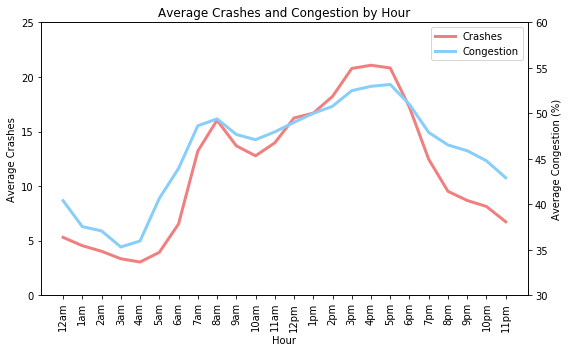

In [81]:
# rc('mathtext', default='regular')

fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)

lns1 = ax1.plot(congestion_hour_df.index.values,crash_hour['RD_NO']/730,color='lightcoral',label='Crashes',linewidth=3)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
lns2 = ax2.plot(congestion_hour_df.index.values,congestion_hour_df['congestion'],color='lightskyblue',label='Congestion',linewidth=3)

ax1.set_title("Average Crashes and Congestion by Hour")
ax1.set_xlabel("Hour")
ax1.set_ylabel("Average Crashes")
ax1.set_xticks(crash_hour.index.values)
ax1.set_xticklabels(['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'],ha='center')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylim(0, 25)

ax2.set_ylabel("Average Congestion (%)")
ax2.set_ylim(30, 60)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

fig.tight_layout()
plt.savefig("Crashes_and_Congestion_by_Hour.png",bbox_inches='tight')

In [46]:
congestion_month['month'] = congestion3['month']
congestion_month.head()

,TIME,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED,year,month
0,01/29/2015 01:40:35 PM,22,33,429,25.23,2015,01
1,01/05/2015 01:10:46 PM,18,58,1058,21.14,2015,01
2,01/20/2015 05:01:21 AM,14,26,394,25.23,2015,01
3,01/03/2015 05:10:25 AM,24,17,360,23.86,2015,01
4,01/10/2015 08:31:12 PM,23,54,761,19.77,2015,01


In [47]:
congestion_month_present_temp = congestion_month.loc[congestion_month['year'] > "2016",:]
congestion_month_present = congestion_month_present_temp.loc[congestion_month_present_temp['SPEED'] > 0,:]
congestion_month_present.describe()


,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED
count,1.837540e+06,1.837540e+06,1.837540e+06,1.837540e+06
mean,1.479772e+01,3.920652e+01,6.075589e+02,2.403973e+01
std,8.222248e+00,2.841667e+01,4.519525e+02,5.271952e+00
min,1.000000e+00,5.000000e+00,3.000000e+01,6.800000e-01
25%,8.000000e+00,1.900000e+01,2.710000e+02,2.045000e+01
50%,1.500000e+01,3.300000e+01,5.140000e+02,2.386000e+01
75%,2.200000e+01,5.300000e+01,8.410000e+02,2.714000e+01
max,2.900000e+01,2.810000e+02,5.379000e+03,1.738600e+02


In [48]:
congestion_month_clean = congestion_month_present.loc[congestion_month_present['SPEED'] <= 45,:]
congestion_month_clean.head()

,TIME,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED,year,month
3096225,05/03/2018 12:01:31 PM,24,47,845,22.50,2018,05
3096266,05/03/2018 12:01:31 PM,25,18,277,29.32,2018,05
3096389,05/03/2018 12:01:31 PM,26,49,896,27.27,2018,05
3096471,05/03/2018 12:01:31 PM,27,22,270,27.34,2018,05
3100392,05/03/2018 12:01:31 PM,28,7,101,39.55,2018,05


In [49]:
congestion_month_clean.describe()

,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED
count,1.830736e+06,1.830736e+06,1.830736e+06,1.830736e+06
mean,1.477989e+01,3.932104e+01,6.093904e+02,2.392073e+01
std,8.222004e+00,2.840588e+01,4.517612e+02,4.778270e+00
min,1.000000e+00,5.000000e+00,3.000000e+01,6.800000e-01
25%,8.000000e+00,1.900000e+01,2.740000e+02,2.045000e+01
50%,1.500000e+01,3.300000e+01,5.160000e+02,2.386000e+01
75%,2.200000e+01,5.300000e+01,8.420000e+02,2.700000e+01
max,2.900000e+01,2.810000e+02,5.379000e+03,4.500000e+01


In [50]:
congestion_by_mo = congestion_month_clean.groupby('month')
congestion_month_df = pd.DataFrame(congestion_by_mo.mean())
congestion_month_df['congestion'] = (45-congestion_month_df['SPEED']) / 45 * 100
congestion_month_df

,REGION_ID,BUS COUNT,NUMBER OF READS,SPEED,congestion
month,,,,,
01,14.787586,38.825823,599.628925,23.810178,47.088494
02,14.784831,39.238957,608.516291,23.715543,47.298793
03,14.801697,40.363431,622.676245,23.779568,47.156516
04,14.789816,39.278104,607.447075,23.887765,46.916079
05,14.783449,40.303375,629.968675,23.973612,46.725308
06,14.762657,40.035616,620.264663,24.012144,46.639679
07,14.754015,38.251225,592.145435,24.227078,46.162050
08,14.781454,40.256807,621.520210,24.127299,46.383780
09,14.757361,39.159046,612.595766,24.067562,46.516529
